In [134]:
# IMPORT LIBRARIES

import numpy as np													# Numerical computations
import pandas as pd 												# Data structures
import matplotlib.pyplot as plt										# Statistic visualizations
import matplotlib.ticker as mticker									# Ticker formatting
from pandas.plotting import scatter_matrix							# Scatter matrix
import seaborn as sns												# Statistic visualizations
import statsmodels.api as sm										# Model construction
from scipy import stats			                                    # Statistics
import statsmodels.api as sm                                        # Model construction
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, RidgeCV, LassoCV	# Regression model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder      # Assigns numeric ranges 0-1
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier					# Decision Trees
from sklearn.model_selection import train_test_split, KFold				# Test models
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score		# Model accuracy
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost
from sklearn.datasets import load_iris, load_diabetes
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
#from utils import pipeline
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [135]:
df = pd.read_csv("anon_cust_data_1.csv")
df.sample(4)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6715,6715,Female,0,No,No,11,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,990.3,No
3877,3877,Female,0,Yes,Yes,21,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,55.95,1157.05,Yes
1751,1751,Male,0,No,No,14,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.95,1178.4,Yes
1201,1201,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.40,611.65,No


In [136]:
df.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

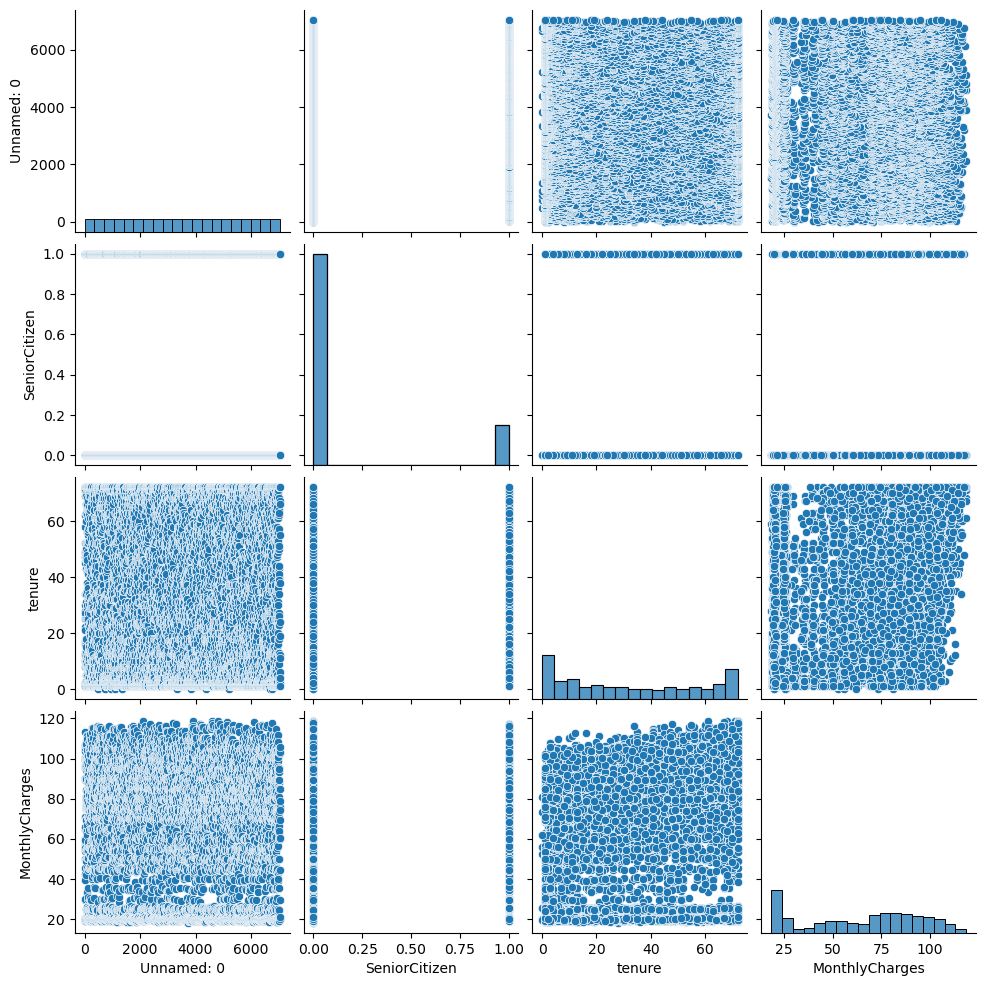

In [137]:
sns.pairplot(df)

In [138]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42)
df.drop(columns='Unnamed: 0', inplace=True)
df['gender'] = pd.Categorical(df['gender']).codes

In [139]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,0,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,0,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
def drop_a_column(df, model):
    results = {}
    for column in df.columns:
        if column == 'Churn':
            continue
        X = df.drop(columns=[column, 'Churn'])
        y = df['Churn']
        X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)
        accuracy_score = accuracy_score(y_test, y_pred)
        results[column] = score
        print(f"Dropping DF Column '{column}' → {model.__class__.__name__}: {accuracy_score:.4f}")
        return results
        # if model == 'ridge':
        #     model = Ridge()
        #     model.fit(X_train, y_train)
        #     y_pred = model.predict(X_test)
        #     accuracy_score = model.score(X_test, y_test)
        #     print(f'Ridge Accuracy Score: {accuracy_score}')
        #     return accuracy_score
        # if model == 'logistic':
        #     model = LogisticRegression()
        #     model.fit(X_train, y_train)
        #     y_pred = model.predict(X_test)
        #     accuracy_score = model.score(X_test, y_test)
        #     print(f'Log Reg Accuracy Score: {accuracy_score}')
        #     return accuracy_score
        # if model == 'decision tree':
        #     model = DecisionTreeClassifier()
        #     model.fit(X_train, y_train)
        #     y_pred = model.predict(X_test)
        #     accuracy_score = model.score(X_test, y_test)
        #     print(f'DTC Accuracy Score: {accuracy_score}')
        #     return accuracy_score
        # if model == 'random forest':
        #     model = RandomForestClassifier()
        #     model.fit(X_train, y_train)
        #     y_pred = model.predict(X_test)
        #     accuracy_score = model.score(X_test, y_test)
        #     print(f'RFC Accuracy Score: {accuracy_score}')
        #     return accuracy_score
        
# drop_a_column(df, model = Ridge())